In [1]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Dropout
from tensorflow.keras.utils import to_categorical 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import os
import librosa
import librosa.display
import glob 
import skimage

In [2]:
df = pd.read_csv("/Users/gokseld/Downloads/UrbanSound8K/UrbanSound8K.csv")
df.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [3]:
dat1, sampling_rate1 = librosa.load('/Users/gokseld/Downloads/UrbanSound8K/audio/fold5/100032-3-0-0.wav')

Text(0.5, 1.0, 'Linear-frequency power spectrogram')

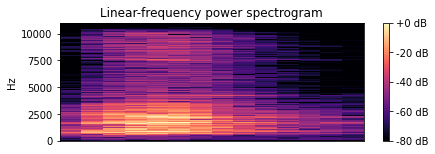

In [4]:
plt.figure(figsize=(15, 10))
D = librosa.amplitude_to_db(np.abs(librosa.stft(dat1)), ref=np.max)
plt.subplot(4, 2, 1)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

In [5]:
feature = []
label = []

def split(row):
    for i in range(8732):
        file_name = '/Users/gokseld/Downloads/UrbanSound8K/audio/fold' + str(df["fold"][i]) + '/' + df["slice_file_name"][i]
        X, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mels = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T,axis=0)        
        feature.append(mels)
        label.append(df["classID"][i])
    return [feature, label]

In [6]:
temp = split(df)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1323
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1103
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1523
  return f(*args, **kwargs)


In [7]:
temp = np.array(temp)
data = temp.transpose()

/var/folders/t6/yngngjtn5lb_y7k_m06frlkr0000gn/T/ipykernel_32260/1993562939.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  temp = np.array(temp)


In [8]:
X_ = data[:, 0]
Y = data[:, 1]
print(X_.shape, Y.shape)
X = np.empty([8732, 128])

(8732,) (8732,)


In [9]:
for i in range(8732):
    X[i] = (X_[i])

In [10]:
Y = to_categorical(Y)

In [11]:
print(X.shape)
print(Y.shape)

(8732, 128)
(8732, 10)


In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 1)
X_train = X_train.reshape(6549, 16, 8, 1)
X_test = X_test.reshape(2183, 16, 8, 1)

In [15]:
input_dim = (16, 8, 1)

In [17]:
np.save("/Users/gokseld/Downloads/UrbanSound8K/X_train", X_train)

In [18]:
np.save("/Users/gokseld/Downloads/UrbanSound8K/Y_train", Y_train)

In [19]:
np.save("/Users/gokseld/Downloads/UrbanSound8K/X_test", X_test)

In [20]:
np.save("/Users/gokseld/Downloads/UrbanSound8K/Y_test", Y_test)

In [25]:
np.load('/Users/gokseld/Downloads/UrbanSound8K/X_train.npy',"r")

memmap([[[[1.40592213e+01],
          [1.55373211e+01],
          [9.97596073e+00],
          ...,
          [6.26926243e-01],
          [2.53791183e-01],
          [1.80456424e+00]],

         [[3.15338945e+00],
          [1.54282641e+00],
          [2.44042873e+00],
          ...,
          [4.94355828e-01],
          [6.83517516e-01],
          [4.03101563e-01]],

         [[1.11934590e+00],
          [5.58620691e-01],
          [1.52265358e+00],
          ...,
          [2.13232112e+00],
          [4.25532103e+00],
          [1.45044029e+00]],

         ...,

         [[1.66678354e-02],
          [7.96784926e-03],
          [8.39082152e-03],
          ...,
          [5.52416407e-03],
          [6.06355863e-03],
          [6.56462833e-03]],

         [[6.89657917e-03],
          [7.76572572e-03],
          [4.80588246e-03],
          ...,
          [4.62374091e-03],
          [4.15731454e-03],
          [2.62750359e-03]],

         [[2.00630212e-03],
          [1.11476495e-03],
    